#**SEMANA  6 Introducción a la programación con Python**

Esta semana analizaremos la libreria Scikit-Learn:

* ¿Qué es Sckit-Learn?
* Preprocesamiento de datos.
* Desafío final.

##**¿Qué es Scikit-Learn?**



* Scikit-learn es una biblioteca de Python diseñada para Machine Learning.

* Es ampliamente utilizada por su simplicidad y variedad de herramientas para tareas como clasificación, regresión, agrupamiento, reducción de dimensionalidad y preprocesamiento de datos.

**Características principales:**
* Soporta diversos algoritmos de ML.
* Incluye herramientas para preprocesamiento de datos.
* Fácil integración con otras bibliotecas como NumPy, Pandas y Matplotlib.

##**Preprocesamiento de datos**

Scikit-learn ofrece varias herramientas para transformar y preparar datos antes de aplicar algoritmos de ML.

###**1. Escalado de datos**


* El escalado ajusta los valores de las características para que estén dentro de un rango específico o tengan características estadísticas deseadas.

* Los algoritmos de ML funcionan mejor cuando los datos están normalizados o escalados a rangos específicos.

####**1.1 MinMaxScaler**

Escala los datos a un rango específico, generalmente [0, 1].

In [2]:
# Ejemplo
from sklearn.preprocessing import MinMaxScaler

# Datos de ejemplo
import pandas as pd
df = pd.DataFrame({'A': [10, 20, 30], 'B': [5, 15, 25]})
# Salida del dataframe original
print ("DataFrame original :\n", df)

# Escalar al rango [0, 1]
 # Inicialización del Escalador
 # Se crea una instancia de la clase MinMaxScaler.
 # Este escalador transformará los valores de cada columna para que estén
 #dentro del rango [0, 1], utilizando la fórmula: valor escalado = valor-minimo/ (máximo-mínimo)
scaler = MinMaxScaler()

# Transformación y Escalado
 # scaler.fit_transform(df)
 # Calcula el mínimo y el máximo de cada columna en el DataFrame df.
 # Escala cada valor de acuerdo con la fórmula anterior.
 # pd.DataFrame(..., columns=df.columns):
 # Convierte el resultado (que es un array de NumPy) nuevamente en un DataFrame de Pandas.
 # Asigna los mismos nombres de columnas que el DataFrame original (df.columns).
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Datos escalados al rango [0, 1]:\n", df_scaled)


DataFrame original :
     A   B
0  10   5
1  20  15
2  30  25
Datos escalados al rango [0, 1]:
      A    B
0  0.0  0.0
1  0.5  0.5
2  1.0  1.0


####**1.2 StandardScaler**


Normaliza los datos para que tengan una media de 0 y una desviación estándar de 1.

In [3]:
# Ejemplo
from sklearn.preprocessing import StandardScaler

# Datos de ejemplo
import pandas as pd
df = pd.DataFrame({'A': [10, 20, 30], 'B': [5, 15, 25]})
# Salida del dataframe original
print ("DataFrame original :\n", df)

# Escalar los datos con media=0 y std=1
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Datos escalados con StandardScaler:\n", df_standardized)


DataFrame original :
     A   B
0  10   5
1  20  15
2  30  25
Datos escalados con StandardScaler:
           A         B
0 -1.224745 -1.224745
1  0.000000  0.000000
2  1.224745  1.224745


####**1.3. RobustScaler**


Escala los datos usando la mediana y el rango intercuartílico (IQR), lo que lo hace resistente a valores atípicos.

El rango intercuartílico (IQR, por sus siglas en inglés) es una medida de dispersión que representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de un conjunto de datos.

Al aplicar RobustScaler, la transformación reduce la influencia de los valores atípicos al basarse en los cuartiles, en lugar de la media y la desviación estándar, que son sensibles a los outliers.

In [4]:
# Ejemplo
from sklearn.preprocessing import RobustScaler

# Datos de ejemplo
import pandas as pd
df = pd.DataFrame({'A': [10, 20, 30], 'B': [5, 15, 25]})
# Salida del dataframe original
print ("DataFrame original :\n", df)

# Escalar los datos con RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Datos escalados con RobustScaler:\n", df_robust)


DataFrame original :
     A   B
0  10   5
1  20  15
2  30  25
Datos escalados con RobustScaler:
      A    B
0 -1.0 -1.0
1  0.0  0.0
2  1.0  1.0


###**2. Imputación de Valores Faltantes**

scikit-learn permite rellenar valores faltantes (NaN) con valores estadísticos como la media, mediana o un valor constante.

####**2.1 Imputación con la Media**

In [5]:
# Ejemplo
# SimpleImputer: Herramienta de scikit-learn para manejar valores faltantes
#en datos.
#Permite reemplazar los valores faltantes con una estrategia definida,
#como la media, mediana, o un valor constante.
from sklearn.impute import SimpleImputer
# numpy: Biblioteca usada para trabajar con arrays
#y para representar valores faltantes con np.nan
import numpy as np

# Datos con valores faltantes
data = pd.DataFrame({'A': [1, 2, np.nan], 'B': [4, np.nan, 6]})
print ("DataFrame original :\n", data)

# Imputar con la media
# SimpleImputer se configura con la estrategia mean,
# lo que significa que los valores faltantes serán reemplazados por la media
# de cada columna.
# Otras estrategias disponibles:
# median: Usa la mediana.
# most_frequent: Usa el valor más frecuente.
# constant: Usa un valor constante especificado por el usuario.
imputer = SimpleImputer(strategy='mean')

# Imputación de Valores Faltantes:
# imputer.fit_transform(data):
# fit: Calcula la media de cada columna.
# transform: Reemplaza los valores faltantes por la media calculada.
# Los resultados se convierten nuevamente a un DataFrame con los mismos
# nombres de columnas.

data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("Datos después de la imputación con la media:\n", data_imputed)


DataFrame original :
      A    B
0  1.0  4.0
1  2.0  NaN
2  NaN  6.0
Datos después de la imputación con la media:
      A    B
0  1.0  4.0
1  2.0  5.0
2  1.5  6.0


###**3. Codificación de datos categóricos**

Los modelos de machine learning requieren datos numéricos, por lo que es necesario transformar datos categóricos en números.

####**3.1 One-Hot Encoding**

Convierte categorías en columnas binarias o one-hot-encoding.

**Columnas Binarias**
>Una columna binaria es una representación en la que cada categoría de una variable categórica se representa como un único bit o valor binario (0 o 1).

>>**Estructura:**
>>>Generalmente, toda la información de las categorías está contenida en una sola columna.
Por ejemplo:

>>>Categoría A → 0

>>>Categoría B → 1

>>**Ejemplo:** Si tenemos la columna Género:
>>>Original: ['Hombre', 'Mujer', 'Hombre'].

>>>Representación Binaria: [0, 1, 0]

>>**Usos Comunes:**
>>>Variables con dos categorías (variables binarias o dicotómicas).

>>**Ejemplo:**
>>>Género (Hombre/Mujer),

>>>¿Compra realizada? (Sí/No).

>>**Ventaja:**
>>>Es más eficiente en términos de almacenamiento y procesamiento porque solo necesita una columna.

>>**Limitación:**
>>>Solo se puede usar cuando la variable tiene exactamente dos categorías.


**One-Hot Encoding**
>Crea una columna separada para cada categoría de una variable categórica, y marca con un 1 si la fila pertenece a esa categoría o con un 0 si no.

>>Estructura:
>>>Cada categoría tiene su propia columna binaria.
>>>Categoría A → [1, 0, 0]
>>>Categoría B → [0, 1, 0]
>>>Categoría C → [0, 0, 1]

>>Ejemplo:
>>>Si tenemos la columna Género:
>>>Original: ['Hombre', 'Mujer', 'Hombre']

>>>[One-Hot Encoding](https://drive.google.com/file/d/1ssf2uNd7Hu55GG04LjBkd8RjbwjrPZgH/view?usp=sharing):


>>**Usos Comunes:**
>>>Variables con tres o más categorías.

>>**Ejemplo:**
>>>Color (Rojo, Azul, Verde),

>>>Nivel Educativo (Primaria, Secundaria, Universitaria).

>>**Ventaja:**
>>>Funciona con cualquier cantidad de categorías y mantiene las relaciones de exclusividad entre categorías.

>>**Limitación:**
>>>Aumenta significativamente el número de columnas cuando hay muchas categorías.

[Tabla resumen](https://drive.google.com/file/d/1ZxU8jnVTCmVSjI5Ze8F28zQdVUn3lOel/view?usp=sharing)

In [5]:
# Ejemplo

# Importación del OneHotEncoder
# Esta herramienta de scikit-learn se utiliza para convertir datos categóricos
# en un formato que los modelos de machine learning puedan manejar: columnas binarias
# o One-Hot Encoding.
# Cada categoría única se convierte en una columna separada con valores 1
# (si pertenece a esa categoría) o 0 (si no pertenece).

from sklearn.preprocessing import OneHotEncoder

# Datos categóricos
data = pd.DataFrame({'Género': ['Hombre', 'Mujer', 'Hombre']})

# Codificación One-Hot
#cInicialización del Codificador One-Hot:
# OneHotEncoder convierte los valores categóricos en columnas binarias.
# Parámetro sparse=False:
# Por defecto, OneHotEncoder devuelve una matriz dispersa (sparse matrix) para ahorrar memoria.
# Matriz densa:
# Es una matriz "normal", donde se almacenan todos los valores,
# incluyendo los ceros. Cada elemento se guarda, sin importar si es 0 o cualquier otro número.
# Es más fácil de usar y manipular, pero puede ocupar mucha memoria si la matriz es grande.
# Matriz dispersa:
# Solo guarda los valores no nulos (por ejemplo, los valores distintos de cero).
# Es muy eficiente en memoria cuando la matriz tiene muchos ceros,
# como en la codificación one-hot, porque no guarda los ceros, solo los valores que realmente importan.

# Aquí usamos sparse=False para obtener una matriz densa más fácil de manipular con Pandas.
encoder = OneHotEncoder(sparse_output=False)

# Codificación One-Hot:
# encoder.fit_transform(data):
# fit: Aprende las categorías únicas en la columna Género
# (en este caso, "Hombre" y "Mujer").
# transform: Convierte los datos categóricos en columnas binarias.
# pd.DataFrame(...):
# Convierte el resultado de fit_transform (un array de NumPy) nuevamente en un DataFrame.
# encoder.get_feature_names_out():
# Genera los nombres de las nuevas columnas en función de las categorías únicas encontradas.
# Por ejemplo, genera las columnas Género_Hombre y Género_Mujer.
data_encoded = pd.DataFrame(encoder.fit_transform(data), columns=encoder.get_feature_names_out(['Género']))
print("Datos codificados con One-Hot Encoding:\n", data_encoded)


Datos codificados con One-Hot Encoding:
    Género_Hombre  Género_Mujer
0            1.0           0.0
1            0.0           1.0
2            1.0           0.0


In [ ]:
# Otro ejemplo agregando más categorías
# Supongamos que añadimos las cateogrías "Otro", "prefiero no decirlo":
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Datos con más categorías
data = pd.DataFrame({'Género': ['Hombre', 'Mujer', 'Otro', 'Prefiero no decirlo', 'Hombre', 'Otro']})

# Crear el codificador One-Hot
encoder = OneHotEncoder(sparse_output=False)  # Cambiar sparse_output para scikit-learn >=1.2.0
data_encoded = pd.DataFrame(encoder.fit_transform(data[['Género']]),
                            columns=encoder.get_feature_names_out(['Género']))

print("Datos codificados con One-Hot Encoding:\n", data_encoded)


Datos codificados con One-Hot Encoding:
    Género_Hombre  Género_Mujer  Género_Otro  Género_Prefiero no decirlo
0            1.0           0.0          0.0                         0.0
1            0.0           1.0          0.0                         0.0
2            0.0           0.0          1.0                         0.0
3            0.0           0.0          0.0                         1.0
4            1.0           0.0          0.0                         0.0
5            0.0           0.0          1.0                         0.0


####**3.2 Binarización**

Convierte valores numéricos en valores binarios en función de un umbral.

In [6]:
# Importación del Binarizer:
# Se importa Binarizer desde scikit-learn.
# Binarizer es una herramienta que se utiliza para transformar
# datos numéricos en datos binarios (0 o 1) en función de un umbral (threshold).
# Es útil cuando deseamos convertir datos continuos en datos discretos
# según un valor límite (umbral).
from sklearn.preprocessing import Binarizer

# Datos de ejemplo
data = pd.DataFrame({'Notas': [7, 4, 3, 5, 6]})

# Binarización con umbral 5
# Inicialización del Binarizer:
# Se crea un objeto binarizer utilizando la clase Binarizer y se le asigna
# un umbral de 5 (threshold=5).
# Este umbral es el valor de corte para convertir las notas en valores binarios.
# Si una nota es mayor o igual a 5, se convierte en 1. Si es menor que 5, se convierte en 0.
binarizer = Binarizer(threshold=5)

# Transformación de los Datos:
# binarizer.fit_transform(data):
# fit: Calcula el umbral (en este caso no es necesario porque ya lo hemos definido, pero es parte del proceso).
# transform: Aplica la binarización a los datos.
# Las notas que son mayores o iguales a 5 se convierten en 1, y las notas menores a 5 se convierten en 0.
# pd.DataFrame(...):
# Convierte el array resultante en un DataFrame de Pandas con una nueva columna llamada Notas Binarizadas.
data_binarized = pd.DataFrame(binarizer.fit_transform(data), columns=['Notas Binarizadas'])
print("Datos binarizados:\n", data_binarized)


Datos binarizados:
    Notas Binarizadas
0                  1
1                  0
2                  0
3                  0
4                  1


##**Desafío**

**Objetivo:** Analizar y procesar los datos de estudiantes para descubrir patrones, realizar transformaciones, y crear visualizaciones utilizando NumPy, Pandas, Sckit-Learn y Matplotlib.

1. **Cargue el archivo datos_estudiantes_desafio.csv**
* El archivo datos_estudiantes_desafio.csv contiene 20 mil registros:
 * Estudiante_ID: Identificador único del estudiante.
 * Edad: Edad del estudiante.
 * Horas_de_estudio: Número promedio de horas de estudio por semana.
 * Nota_Matemáticas, Nota_Lenguaje, Nota_Ciencias: Calificaciones en cada asignatura.
 * Genero: Género del estudiante.
 * Comuna: Comuna donde reside el estudiante.


2. **Exploración de datos:**
* Verificar las primeras y últimas filas del conjunto de datos (head y tail).
* Mostrar la forma del conjunto de datos (shape).
* Mostrar estadísticas descriptivas de las columnas numéricas (describe).
* Pregunta: ¿Cuál es el rango de edad más común entre los estudiantes?


3. **Limpieza de Datos:**
* Verificar y manejar valores nulos o faltantes en el conjunto de datos.
 * Identificar si hay valores nulos (isnull).
 * Si hay valores nulos, reemplazarlos por la mediana en las columnas numéricas.
* Pregunta: ¿Cuál es el porcentaje de datos faltantes en cada columna?


4. **Análisis Exploratorio:**
* Calcular las siguientes métricas para las columnas de calificaciones:
 * Promedio general por asignatura.
 * Promedio por estudiante.
* Determinar el porcentaje de estudiantes que tienen una calificación mayor o igual a 60 en las tres asignaturas.
* Pregunta: ¿Qué comuna tiene el promedio más alto en matemáticas?


5. **Filtros y Agrupaciones:**
* Filtrar estudiantes con calificaciones promedio mayores a 80 y mostrarlos en un nuevo DataFrame.
* Agrupar los datos por género y calcular el promedio de calificaciones por género.

### **Parte 2 - Análisis visual y preprocesamiento con Scikit-learn**

En esta parte del desafío, trabajará con visualización de datos y técnicas de preprocesamiento.

### Visualización exploratoria:
1. Crea histogramas de las variables `edad`, `notas`, y `tiempo_estudio` para ver su distribución.
2. Crea un gráfico de dispersión entre `tiempo_estudio` y `notas` para ver si hay una posible correlación.
3. Usa `sns.boxplot()` para comparar las notas de estudiantes por género (`genero`).
4. Calcula y visualiza la matriz de correlación entre las variables numéricas usando `sns.heatmap()`.

### Preprocesamiento con Scikit-learn:
1. Escala las columnas numéricas (`edad`, `tiempo_estudio`, `notas`) usando `StandardScaler`.
2. Convierte las variables categóricas como `genero` o `tipo_escuela` en variables numéricas usando `OneHotEncoder`.
3. Crea un nuevo DataFrame con los datos preprocesados y muéstralo.

> **Nota:** Esta sección solo contempla el preprocesamiento, no se debe aplicar ningún modelo de ML todavía.

Puedes apoyarte en el contenido de los cuadernos anteriores para guiar tu análisis.
        

   Estudiante_ID  Edad  Horas_de_estudio  Nota_Matemáticas  Nota_Lenguaje  \
0              1    19                38                23             53   
1              2    18                11                83             22   
2              3    18                38                55             96   
3              4    20                23                32             46   
4              5    25                20                17             35   

   Nota_Ciencias               Genero     Comuna  
0             26  prefiero no decirlo      Penco  
1             21             femenino      Penco  
2             12  prefiero no decirlo  San Pedro  
3             79  prefiero no decirlo       Lota  
4             56            masculino    Hualpén  
       Estudiante_ID  Edad  Horas_de_estudio  Nota_Matemáticas  Nota_Lenguaje  \
19995          19996    20                21                46             80   
19996          19997    25                27                19       

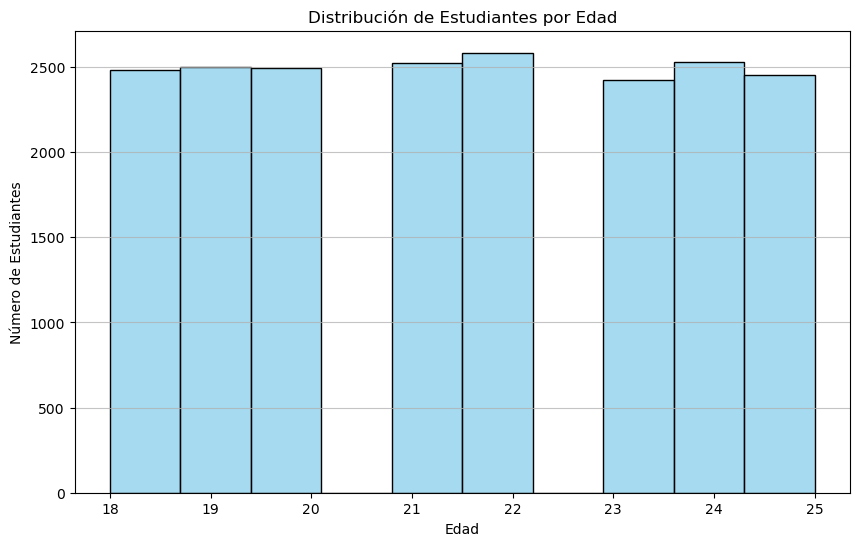

Entre 20 y 23 esta el mayor rango de edad


In [1]:
# Verificar las primeras y últimas filas del conjunto de datos (head y tail).
# Mostrar la forma del conjunto de datos (shape).
# Mostrar estadísticas descriptivas de las columnas numéricas (describe).
# Pregunta: ¿Cuál es el rango de edad más común entre los estudiantes?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #np es un alias
# Esta línea mágica permite que los gráficos de Matplotlib se muestren directamente dentro del notebook.
# Aunque en Google Colab suele estar activada por defecto, es buena práctica incluirla.
%matplotlib inline

# Importar el dataset
df = pd.read_csv("../data/datos_estudiantes_desafio.csv")
#Verificar las primeras y últimas filas del conjunto de datos (head y tail).
print(df.head())
print(df.tail())
print(df.shape)
print(df.describe())
#Rango de edad mas frecuente
#Tamaño del diagrama de 10 cols por 6 filas
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Edad', bins=10, color='skyblue', edgecolor='black') 
plt.title('Distribución de Estudiantes por Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Estudiantes')
plt.grid(axis='y', alpha=0.75) #Se agregan lineas de cuadricula

plt.show()

print("Entre 20 y 23 esta el mayor rango de edad")

In [5]:
#. **Limpieza de Datos:**
# Verificar y manejar valores nulos o faltantes en el conjunto de datos.
# Identificar si hay valores nulos (isnull).
# Si hay valores nulos, reemplazarlos por la mediana en las columnas numéricas.
# Pregunta: ¿Cuál es el porcentaje de datos faltantes en cada columna?
print("¿Dónde hay valores nulos?\n", df.isnull())
nulos=df.isnull().sum()
print("\nNúmero de datos nulos por columna:\n", nulos)
largo_df=len(df["Estudiante_ID"])
print("Tamaños informacion:",largo_df)
porcentaje=(100*nulos)/20000
print("Porcentaje:",porcentaje)
print("NO HAY NULOS")

¿Dónde hay valores nulos?
        Estudiante_ID   Edad  Horas_de_estudio  Nota_Matemáticas  \
0              False  False             False             False   
1              False  False             False             False   
2              False  False             False             False   
3              False  False             False             False   
4              False  False             False             False   
...              ...    ...               ...               ...   
19995          False  False             False             False   
19996          False  False             False             False   
19997          False  False             False             False   
19998          False  False             False             False   
19999          False  False             False             False   

       Nota_Lenguaje  Nota_Ciencias  Genero  Comuna  
0              False          False   False   False  
1              False          False   False   False  
2     

In [2]:
#. **Análisis Exploratorio:**
# Calcular las siguientes métricas para las columnas de calificaciones:
# Promedio general por asignatura.
# Promedio por estudiante.
# Determinar el porcentaje de estudiantes que tienen una calificación mayor o igual a 60 en las tres asignaturas.
# Pregunta: ¿Qué comuna tiene el promedio más alto en matemáticas?
promedio_mat=df["Nota_Matemáticas"].mean()
promedio_leng=df["Nota_Lenguaje"].mean()
promedio_cs=df["Nota_Ciencias"].mean()
print("Promedios\n")
print("Mat,",promedio_mat)
print("Leng,",promedio_leng)
print("CS,",promedio_cs)
tabla_pivot = df.pivot_table(values=["Nota_Matemáticas", "Nota_Lenguaje", "Nota_Ciencias"], index="Estudiante_ID", aggfunc="mean")
print("Tabla pivot con promedio por Estudiante_ID:\n", tabla_pivot)
#Determinar el porcentaje de estudiantes que tienen una calificación mayor o igual a 60 en las tres asignaturas.
df['Promedio'] = df[['Nota_Matemáticas', 'Nota_Lenguaje', 'Nota_Ciencias']].mean(axis=1)
promedio_alto = df[df['Promedio'] >= 60]
print("numero de estudiantes con promedio mayor o igual a 60:",len(promedio_alto))
print("% Estudiantes con promedio >= 60:\n", (100*len(promedio_alto))/len(tabla_pivot))
# Pregunta: ¿Qué comuna tiene el promedio más alto en matemáticas?
promedio_por_comuna = df.groupby("Comuna")[["Nota_Matemáticas"]].mean().sort_values(by="Nota_Matemáticas", ascending=False)
print("Promedio x Comuna\n",promedio_por_comuna.shape[0])
print("Comuna con mejor promedio\n",promedio_por_comuna.head(1).shape[0])

Promedios

Mat, 50.83745
Leng, 50.4696
CS, 50.59365
Tabla pivot con promedio por Estudiante_ID:
                Nota_Ciencias  Nota_Lenguaje  Nota_Matemáticas
Estudiante_ID                                                
1                       26.0           53.0              23.0
2                       21.0           22.0              83.0
3                       12.0           96.0              55.0
4                       79.0           46.0              32.0
5                       56.0           35.0              17.0
...                      ...            ...               ...
19996                   68.0           80.0              46.0
19997                   60.0           91.0              19.0
19998                   70.0           53.0              88.0
19999                   30.0           22.0              24.0
20000                   40.0           95.0              37.0

[20000 rows x 3 columns]
numero de estudiantes con promedio mayor o igual a 60: 5972
% Estudiant

In [4]:
#Filtros y Agrupaciones:
#Filtrar estudiantes con calificaciones promedio mayores a 80 y mostrarlos en un nuevo DataFrame.
#Agrupar los datos por género y calcular el promedio de calificaciones por género.
# Filtrar estudiantes con promedio > 80
df_prom_mayor_80 = df[df['Promedio'] > 80].copy() 
print("Estudiantes con promedio > 80: ", df_prom_mayor_80.shape[0])
print(df_prom_mayor_80.head())

# Agrupar por género y calcular promedio de calificaciones por género
group_genero = df.groupby('Genero')[['Nota_Matemáticas', 'Nota_Lenguaje', 'Nota_Ciencias'] + ['Promedio']].mean()    
print(group_genero)

# También mostrar conteo por género
print("\nConteo por género:")
print(df['Genero'].value_counts())   


Estudiantes con promedio > 80:  708
     Estudiante_ID  Edad  Horas_de_estudio  Nota_Matemáticas  Nota_Lenguaje  \
35              36    24                20                88             65   
80              81    21                17                80             97   
83              84    19                 8                88             95   
85              86    19                12                83             98   
104            105    21                36                97             75   

     Nota_Ciencias               Genero      Comuna   Promedio  
35             100             femenino     Coronel  84.333333  
80              75             femenino        Lota  84.000000  
83              67            masculino      Arauco  83.333333  
85              68  prefiero no decirlo      Arauco  83.000000  
104             82  prefiero no decirlo  Concepción  84.666667  
                     Nota_Matemáticas  Nota_Lenguaje  Nota_Ciencias   Promedio
Genero              

## Visualización exploratoria:
- Crea histogramas de las variables edad, notas, y tiempo_estudio para ver su distribución.
- Crea un gráfico de dispersión entre tiempo_estudio y notas para ver si hay una posible correlación.
- Usa sns.boxplot() para comparar las notas de estudiantes por género (genero).
- Calcula y visualiza la matriz de correlación entre las variables numéricas usando sns.heatmap().

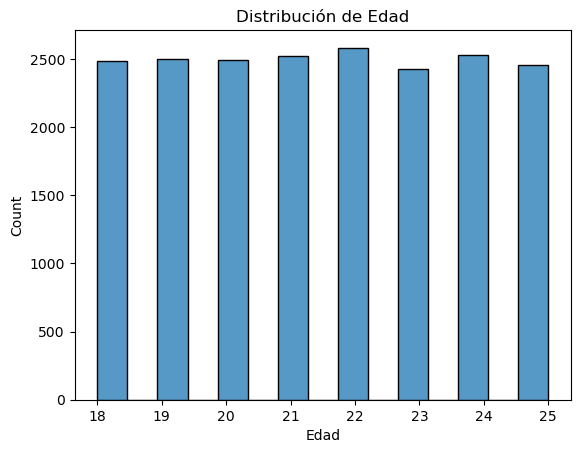

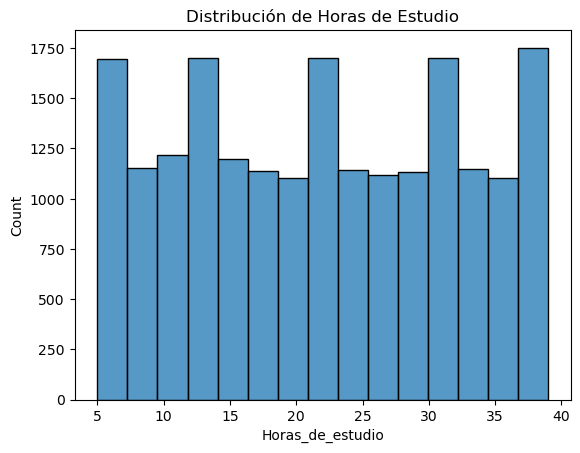

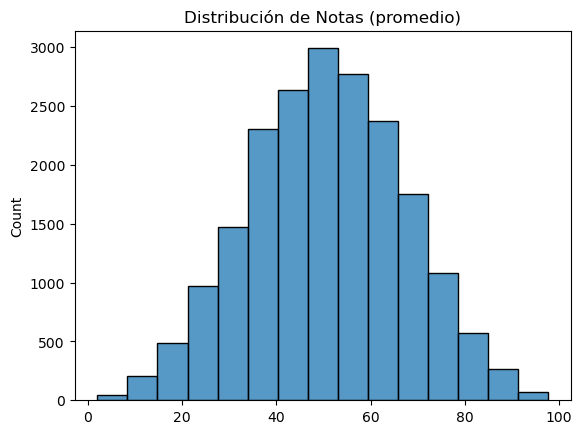

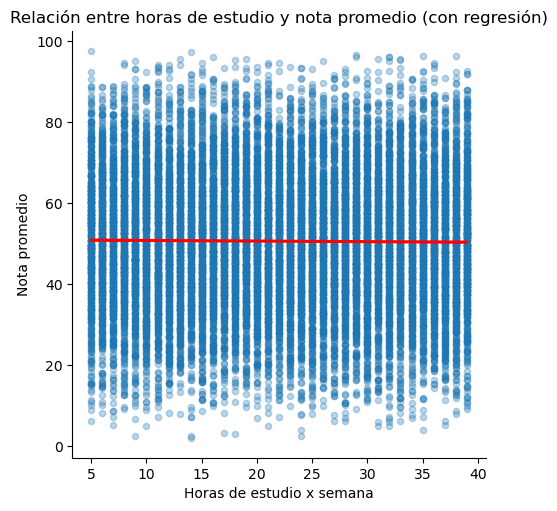

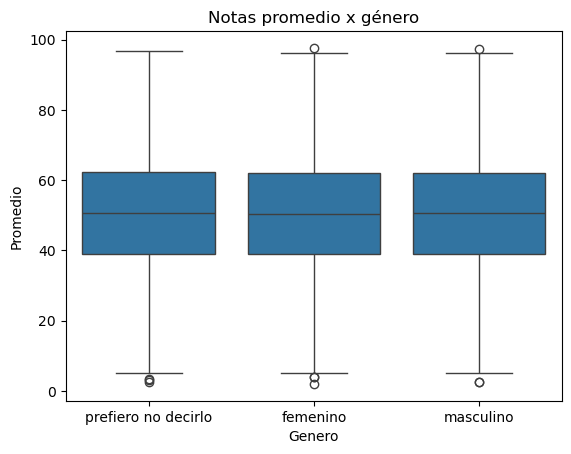

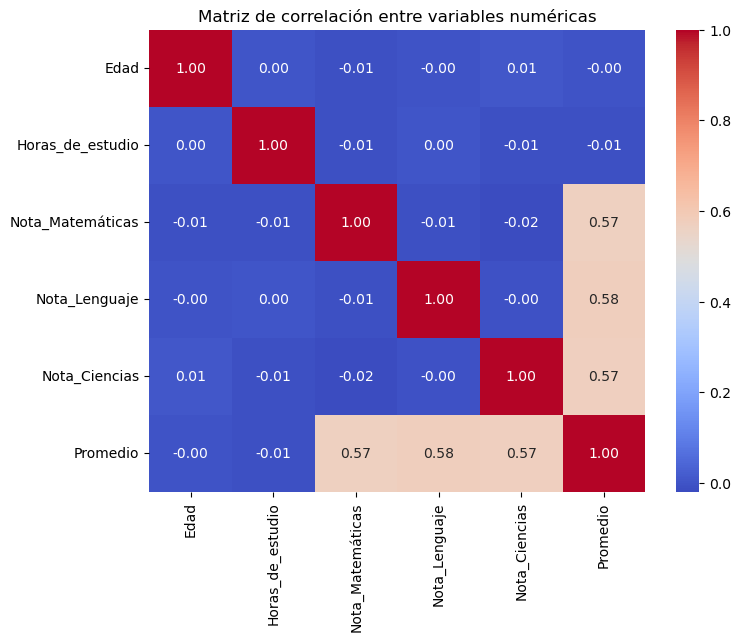

In [19]:
#Crea histogramas de las variables edad, notas, y tiempo_estudio para ver su distribución.
sns.histplot(df['Edad'], bins=15, kde=False) 
plt.title("Distribución de Edad")
plt.show()

sns.histplot(df['Horas_de_estudio'], bins=15, kde=False)
plt.title("Distribución de Horas de Estudio")
plt.show()

sns.histplot(df[['Nota_Matemáticas', 'Nota_Lenguaje', 'Nota_Ciencias']].mean(axis=1), bins=15, kde=False) 
plt.title("Distribución de Notas (promedio)")
plt.show()

#Crea un gráfico de dispersión entre tiempo_estudio y notas para ver si hay una posible correlación.
sns.lmplot(x='Horas_de_estudio', y='Promedio', data=df, scatter_kws={'alpha':0.3, 's':20}, line_kws={'color':'red'})

plt.title("Relación entre horas de estudio y nota promedio (con regresión)")
plt.xlabel("Horas de estudio x semana")
plt.ylabel("Nota promedio")
plt.show()
#Usa sns.boxplot() para comparar las notas de estudiantes por género (genero).
plt.figure()
sns.boxplot(x='Genero', y='Promedio', data=df)
plt.title("Notas promedio x género")
plt.show()

# Calcula y visualiza la matriz de correlación entre las variables numéricas usando sns.heatmap().
corr = df[['Edad', 'Horas_de_estudio','Nota_Matemáticas', 'Nota_Lenguaje', 'Nota_Ciencias','Promedio']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2F")
plt.title("Correlación entre variables numéricas")
plt.show()

## Preprocesamiento con Scikit-learn:
- Escala las columnas numéricas (edad, tiempo_estudio, notas) usando StandardScaler.
- Convierte las variables categóricas como genero o tipo_escuela en variables numéricas usando OneHotEncoder.
- Crea un nuevo DataFrame con los datos preprocesados y muéstralo.
  
Nota: Esta sección solo contempla el preprocesamiento, no se debe aplicar ningún modelo de ML todavía.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Escala las columnas numéricas (edad, tiempo_estudio, notas) usando StandardScaler.
numeric_cols = ['Edad', 'Horas_de_estudio','Nota_Matemáticas', 'Nota_Lenguaje', 'Nota_Ciencias'] 
categoric_cols = ['Genero', 'Comuna']
# Crea una instancia del escalador. Este transforma los datos para que tengan una media (μ) de 0 
# y una desviación estándar (σ) de 1.
numeric_transf = StandardScaler()
# Crea una instancia del codificador. El argumento handle_unknown='ignore' evita que el código falle 
# si aparece una nueva categoría en el conjunto de datos de prueba que no estaba en el de entrenamiento.
categorical_transf = OneHotEncoder(handle_unknown='ignore')

# Convierte las variables categóricas como genero o tipo_escuela en variables numéricas usando OneHotEncoder.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transf, numeric_cols),
        ('cat', categorical_transf, categoric_cols)
    ]
)

# Crea un nuevo DataFrame con los datos preprocesados y muéstralo
X = df[numeric_cols + categoric_cols] 
X_preprocessed = preprocessor.fit_transform(X)

# Convertir resultado a DataFrame con nombres de columnas
# OneHotEncoder nos da nombres automáticamente con get_feature_names_out
ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categoric_cols)
all_cols = numeric_cols + list(ohe_cols)

df_preprocessed = pd.DataFrame(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed,
                                columns=all_cols)

print("DataFrame preprocesado:")
print(df_preprocessed)

DataFrame preprocesado:
           Edad  Horas_de_estudio  Nota_Matemáticas  Nota_Lenguaje  \
0     -1.092392          1.585780         -0.966456       0.087704   
1     -1.530312         -1.081630          1.116614      -0.986756   
2     -1.530312          1.585780          0.144515       1.578084   
3     -0.654472          0.103886         -0.653995      -0.154916   
4      1.535129         -0.192493         -1.174763      -0.536176   
...         ...               ...               ...            ...   
19995 -0.654472         -0.093700         -0.167946       1.023524   
19996  1.535129          0.499058         -1.105327       1.404784   
19997  0.659289         -1.476802          1.290203       0.087704   
19998  0.659289          1.091815         -0.931738      -0.986756   
19999 -0.216552          1.486987         -0.480406       1.543424   

       Nota_Ciencias  Genero_femenino  Genero_masculino  \
0          -0.850919              0.0               0.0   
1          -1.023